# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\UnCategorized_45Feats
df = pd.read_csv('Feats45_unCategAge_APPRDX_Gender.csv')
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\UnCategorized_45Feats
(250, 50)


,PATNO,Patient_ID,APPRDX,Gender,Age,Anxiety,Apathy,Benton,Clock,Cognition,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,3002,2,1,0,67.578082,1,0,12.16,7.0,1,...,57,1,0,45,59,47.5,110.0,204.0,17,1.0
1,3010,6,1,1,46.965716,1,1,7.76,6.0,1,...,36,1,3,40,39,52.0,27.0,52.0,9,0.0


In [3]:
df1 = df.drop(['PATNO','Patient_ID','Gender','Age'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

(250, 46)


,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,0,1,0,12.16,7.0,1,1.0,1,1,0,...,57,1,0,45,59,47.5,110.0,204.0,17,1.0
1,0,1,1,7.76,6.0,1,1.0,0,0,0,...,36,1,3,40,39,52.0,27.0,52.0,9,0.0


# Running Model with different Features

## RanFor 100 times, all 45 Feats 

In [4]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.83125
2
Mean accuracy: 0.8125
3
Mean accuracy: 0.825
4
Mean accuracy: 0.81875
5
Mean accuracy: 0.85
6
Mean accuracy: 0.875
7
Mean accuracy: 0.8375
8
Mean accuracy: 0.80625
9
Mean accuracy: 0.84375
10
Mean accuracy: 0.83125
11
Mean accuracy: 0.81875
12
Mean accuracy: 0.81875
13
Mean accuracy: 0.80625
14
Mean accuracy: 0.85625
15
Mean accuracy: 0.83125
16
Mean accuracy: 0.84375
17
Mean accuracy: 0.83125
18
Mean accuracy: 0.80625
19
Mean accuracy: 0.85625
20
Mean accuracy: 0.8125
21
Mean accuracy: 0.83125
22
Mean accuracy: 0.8375
23
Mean accuracy: 0.85625
24
Mean accuracy: 0.8625
25
Mean accuracy: 0.79375
26
Mean accuracy: 0.8125
27
Mean accuracy: 0.825
28
Mean accuracy: 0.825
29
Mean accuracy: 0.8125
30
Mean accuracy: 0.83125
31
Mean accuracy: 0.8
32
Mean accuracy: 0.85625
33
Mean accuracy: 0.81875
34
Mean accuracy: 0.83125
35
Mean accuracy: 0.81875
36
Mean accuracy: 0.8
37
Mean accuracy: 0.80625
38
Mean accuracy: 0.8125
39
Mean accuracy: 0.84375
40
Mean accuracy: 0.84

In [5]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_unCat45Feats_100RF10FCV.csv", index=False)

0.8240625000000003


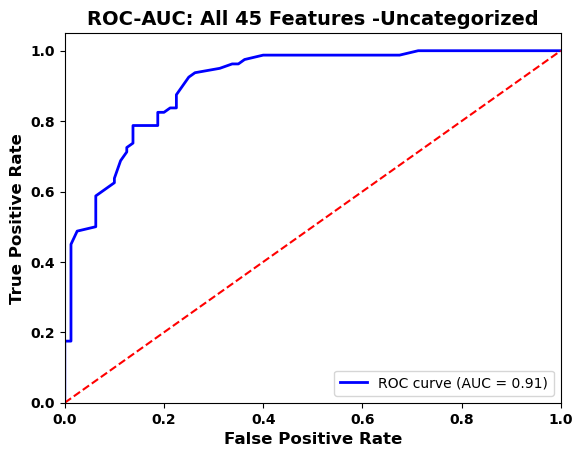

In [6]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features -Uncategorized', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features_unCat.svg')
plt.savefig('ROC_AUC_All45Features_unCat.pdf')
plt.show()
